In [170]:
import pandas as pd
import datetime as dt
import dataframe_image as dfi
from pandas_profiling import ProfileReport
import seaborn as sns
from datetime import datetime
import numpy as np
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import date2num
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# iPhone product release dataset

In [171]:
WIKI_URL = 'https://en.wikipedia.org/wiki/IPhone'
dfs = pd.read_html(WIKI_URL)

In [172]:
print(f'Total tables: {len(dfs)}')

Total tables: 26


In [173]:
table_iphone = pd.read_html('https://en.wikipedia.org/wiki/IPhone', match='Operating system support', header=2)
len(table_iphone)
df = table_iphone[0]
df.reset_index().iloc[:,:].head(2)

,index,model,with OS,date,discontinued,ended,final OS,max,min,launch price ($US)
0,0,iPhone,iPhone OS 1.0,"June 29, 2007","June 9, 2008","June 20, 2010",iPhone OS 3.1.3,"2 years, 11 months",2 years,$499/$599*
1,1,iPhone 3G,iPhone OS 2.0,"July 11, 2008","August 9, 2010","March 3, 2011",iOS 4.2.1,"2 years, 7 months",6 months,$199/$299*$599/$699


In [174]:
table_iphone = pd.read_html('https://en.wikipedia.org/wiki/List_of_iOS_and_iPadOS_devices#iPhone', match='iPhone', header=0)
len(table_iphone)
df = table_iphone[0]
df.head(2)


,Gen.,Model,Announced,Released,Discontinued,Unsupported,Months supported to date,Months supported after discontinuation to date,Unnamed: 8
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago","July 11, 2008; 13 years ago","June 21, 2010; 11 years ago",35 months,23 months,NaN
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago","June 7, 2010; 11 years ago","March 9, 2011; 11 years ago",31 months,9 months,NaN


In [175]:
iphone_df = df.copy()
iphone_df = df[['Gen.', 'Model', 'Announced', 'Released']]
iphone_df['date_announced'] = pd.to_datetime(iphone_df['Announced'], errors='coerce')
iphone_df['date_released'] = iphone_df['Released'].str.split('; ').str[0]
iphone_df['date_released'] = pd.to_datetime(iphone_df['date_released'], errors='coerce')

In [176]:
iphone_df.head()

,Gen.,Model,Announced,Released,date_announced,date_released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago",2009-06-08,2009-06-19
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago",2010-06-07,2010-06-24
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago",2011-10-04,2011-10-14


## AAPL prices dataset

In [177]:
AAPL = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/nasdaq100/2015/20150106/AAPL.csv.gz')
type(AAPL)

pandas.core.frame.DataFrame

In [178]:
iphone_df
dfi.export(iphone_df,"iphone_dates.png")

In [179]:
AAPL_prices = pd.read_csv('AAPL.csv')
AAPL_prices.dropna().head()

,Date,Adj Close,Close,High,Low,Open,Volume
4753,1980-12-12 00:00:00,0.100764,0.128348,0.128906,0.128348,0.128348,469033600.0
4754,1980-12-15 00:00:00,0.095508,0.121652,0.122210,0.121652,0.122210,175884800.0
4755,1980-12-16 00:00:00,0.088498,0.112723,0.113281,0.112723,0.113281,105728000.0
4756,1980-12-17 00:00:00,0.090688,0.115513,0.116071,0.115513,0.115513,86441600.0
4757,1980-12-18 00:00:00,0.093317,0.118862,0.119420,0.118862,0.118862,73449600.0


In [180]:
iphone_df.head()

,Gen.,Model,Announced,Released,date_announced,date_released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago",2009-06-08,2009-06-19
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago",2010-06-07,2010-06-24
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago",2011-10-04,2011-10-14


In [181]:
# create array based on data announced and data released
from datetime import date

In [182]:
iphone_df['pre-Announce'] = pd.to_datetime(iphone_df['date_announced']) - pd.DateOffset(months=3)
iphone_df['post-Announce'] = pd.to_datetime(iphone_df['date_announced']) + pd.DateOffset(months=3)

iphone_df['pre-Released'] = pd.to_datetime(iphone_df['date_released']) - pd.DateOffset(months=3)
iphone_df['post-Released'] = pd.to_datetime(iphone_df['date_released']) + pd.DateOffset(months=3)

In [183]:
iphone_df.head(2)

,Gen.,Model,Announced,Released,date_announced,date_released,pre-Announce,post-Announce,pre-Released,post-Released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29,2006-10-09,2007-04-09,2007-03-29,2007-09-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11,2008-03-09,2008-09-09,2008-04-11,2008-10-11


In [184]:
AAPL_price_subset = AAPL_prices[(AAPL_prices['Date'] > "2006-07-01") & (AAPL_prices['Date'] < "2022-03-12")]
AAPL_price_subset.head()

,Date,Adj Close,Close,High,Low,Open,Volume
11214,2006-07-03 00:00:00,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0
11215,2006-07-05 00:00:00,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0
11216,2006-07-06 00:00:00,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0
11217,2006-07-07 00:00:00,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0
11218,2006-07-10 00:00:00,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0


In [185]:
# subset prices by date ranges of flagship iphone
gen_1_iphone = AAPL_price_subset[(AAPL_price_subset['Date'] > "2006-10-09") & (AAPL_price_subset['Date'] < "2007-09-29")]
iPhone_3G = AAPL_price_subset[(AAPL_price_subset['Date'] > "2008-03-09") & (AAPL_price_subset['Date'] < "2008-10-11")]
iPhone_3GS = AAPL_price_subset[(AAPL_price_subset['Date'] > "2009-03-08") & (AAPL_price_subset['Date'] < "2008-09-19")]
iPhone_4 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2010-03-07") & (AAPL_price_subset['Date'] < "2010-09-24")]
iPhone_4S =  AAPL_price_subset[(AAPL_price_subset['Date'] > "2011-07-04") & (AAPL_price_subset['Date'] < "2012-01-14")]
iPhone_5 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2012-06-12") & (AAPL_price_subset['Date'] < "2012-12-21")]
iPhone_5C = AAPL_price_subset[(AAPL_price_subset['Date'] > "2013-06-10") & (AAPL_price_subset['Date'] < "2013-12-20")]
iPhone_5S = AAPL_price_subset[(AAPL_price_subset['Date'] > "2013-06-10") & (AAPL_price_subset['Date'] < "2013-12-20")]
iPhone_6 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2014-06-09") & (AAPL_price_subset['Date'] < "2014-12-19")]
iPhone_6_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2014-06-09") & (AAPL_price_subset['Date'] < "2014-12-19")]
iPhone_6S = AAPL_price_subset[(AAPL_price_subset['Date'] > "2015-06-09") & (AAPL_price_subset['Date'] < "2015-12-25")]
iPhone_6S_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2015-06-09") & (AAPL_price_subset['Date'] < "2012-12-25")]

iPhone_7 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2016-06-07") & (AAPL_price_subset['Date'] < "2016-12-16")]
iPhone_7_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2016-06-07") & (AAPL_price_subset['Date'] < "2016-12-16")]
iPhone_8 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2017-12-22")]
iPhone_8_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2017-12-22")]
iPhone_X = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2018-02-03")]
iPhone_XR = AAPL_price_subset[(AAPL_price_subset['Date'] > "2018-06-12") & (AAPL_price_subset['Date'] < "2019-01-26")]
iPhone_XS = AAPL_price_subset[(AAPL_price_subset['Date'] > "2018-06-12") & (AAPL_price_subset['Date'] < "2018-12-21")]
iPhone_XS_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2018-012-21")]
iPhone_11 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2019-12-20")]
iPhone_11_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2019-12-20")]
iPhone_11_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2006-10-09") & (AAPL_price_subset['Date'] < "2019-12-20")]

iPhone_12 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-01-23")]
iPhone_12_Mini = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-02-13")]
iPhone_12_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-01-23")]
iPhone_12_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-002-13")]

iPhone_13 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Mini = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]


## iPhone 11

In [186]:
# 2019-09-10	2019-09-20	2019-06-10	2019-12-10	2019-06-20	2019-12-20


iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
iPhone_11['Date_2'] = iPhone_11['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
iPhone_11.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14


In [187]:
# iPhone 11
# announce 2019/9/10
# release 2019/9/20

def new(row):
    if row['Date_2'] < pd.to_datetime('09/20/2019'):
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    else:
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/10/2019'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/20/2019'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/10/2019'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_11['Days'] = iPhone_11.apply(new,axis=1)
iPhone_11['Period'] = iPhone_11.apply(new2, axis=1)
iPhone_11.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10,-102 days,Pre Release
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release


In [188]:
iPhone_11['Period'].value_counts()

Pre Release     64
Post Release    64
Between          9
Name: Period, dtype: int64

In [189]:
iPhone_11['CumSum % Return'] = iPhone_11.groupby(['Period'])['% Return'].cumsum(axis=0)

In [190]:
iPhone_11.dropna().head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release,0.011580
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release,0.008397
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release,0.008191
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release,0.000929
14478,2019-06-17 00:00:00,47.580223,48.472500,48.740002,48.042500,48.224998,58676400.0,0.005966,0.006895,2019-06-17,-95 days,Pre Release,0.006895


<AxesSubplot:xlabel='Days'>

<Figure size 1440x1080 with 0 Axes>

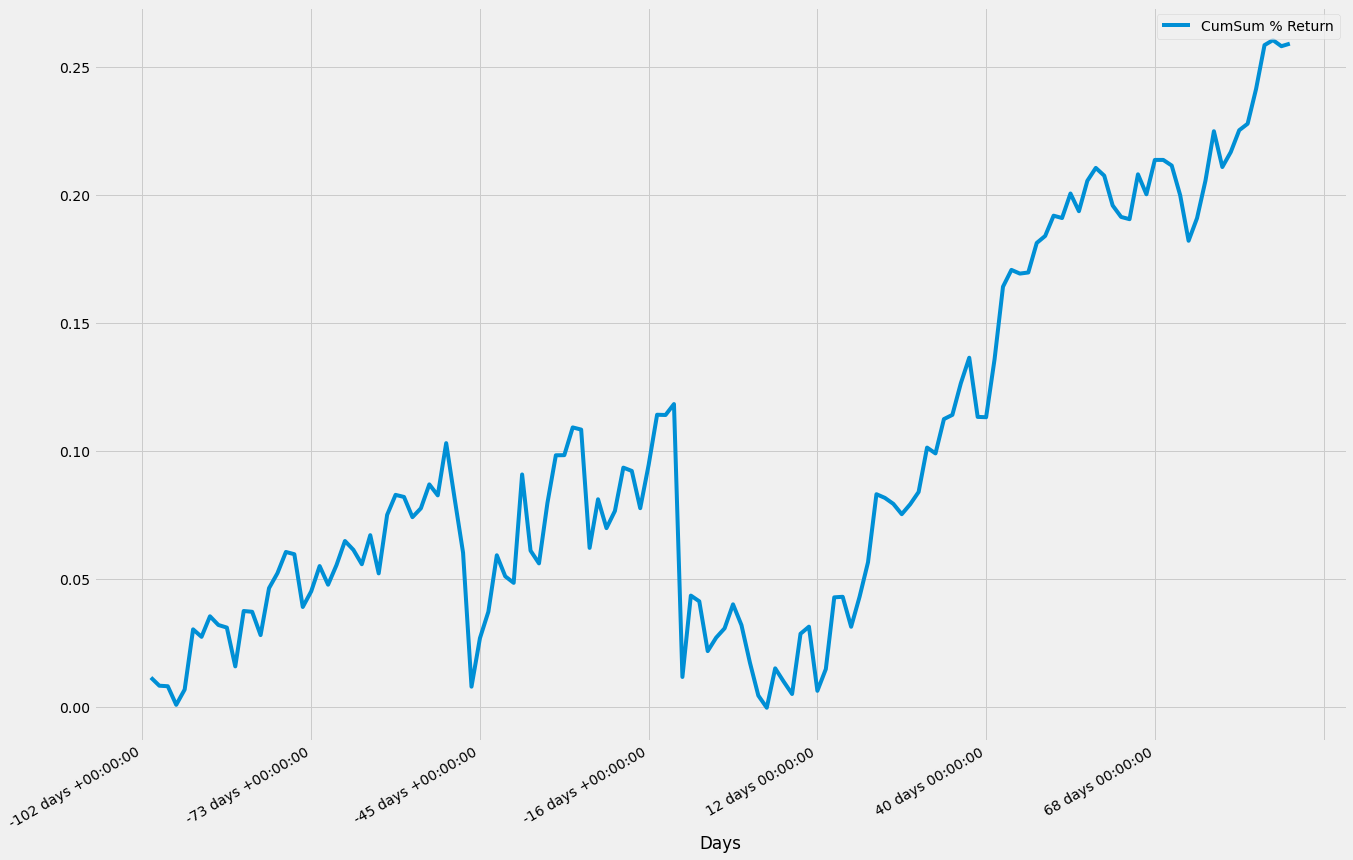

In [191]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
iPhone_11.plot(x='Days', y='CumSum % Return', figsize=(20,15))

In [192]:
#ax1 = iPhone_11.plot.scatter(x='Days',y='CumSum % Return')

iPhone_11['Days'] = iPhone_11['Days'].astype(str)
iPhone_11.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10,-102 days,Pre Release,NaN
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release,0.011580
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release,0.008397
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release,0.008191
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release,0.000929


In [193]:
iPhone_11['Days'] = iPhone_11['Days'].str.replace('days', '')

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='Days', ylabel='CumSum % Return'>

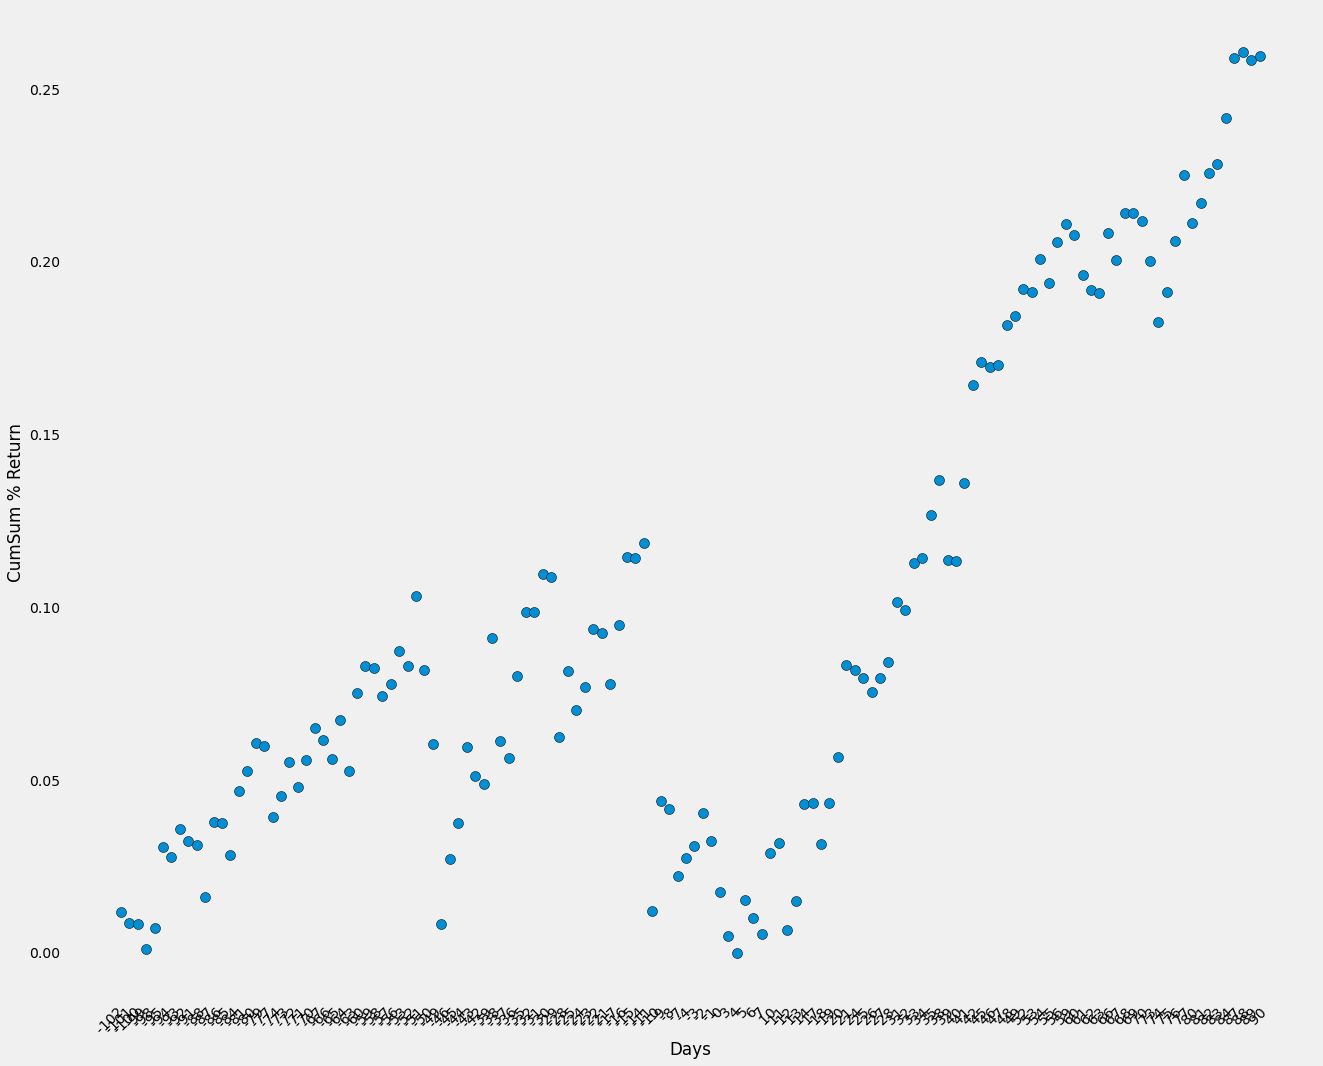

In [194]:
iPhone_11.plot.scatter(x='Days', y='CumSum % Return', figsize=(20,17), grid=False, edgecolor='black', s=100,rot=45)



In [195]:
iPhone_11['CumSum % Return'] = iPhone_11['CumSum % Return']*100

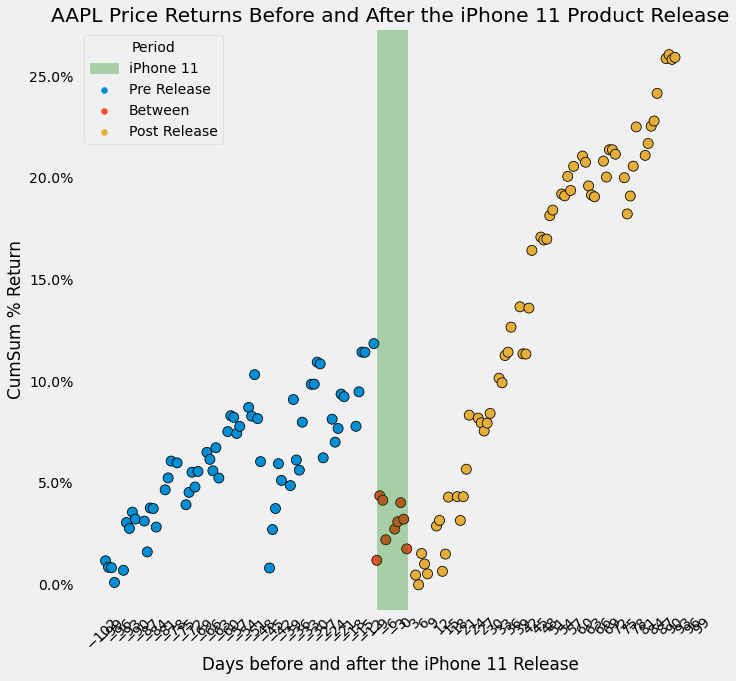

In [196]:
import seaborn as sns
from datetime import datetime
import numpy as np
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import date2num


iPhone_11['Days'] = iPhone_11['Days'].astype('int')


fig, ax = plt.subplots(figsize=(10,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-102,150, 3))
plt.xlabel('Days before and after the iPhone 11 Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 11 Product Release')
ax.axvspan(-10,0, label="iPhone 11", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_11, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone11.png')





## iPhone X

In [197]:
iPhone_X.head()

,Date,Adj Close,Close,High,Low,Open,Volume
13971,2017-06-12 00:00:00,34.612671,36.355000,36.522499,35.627499,36.435001,289229200.0
13972,2017-06-13 00:00:00,34.891159,36.647499,36.862499,36.287498,36.790001,136661600.0
13973,2017-06-14 00:00:00,34.550785,36.290001,36.875000,35.959999,36.875000,126124800.0
13974,2017-06-15 00:00:00,34.343712,36.072498,36.119999,35.552502,35.830002,128661600.0
13975,2017-06-16 00:00:00,33.862915,35.567501,36.125000,35.549999,35.945000,201444400.0


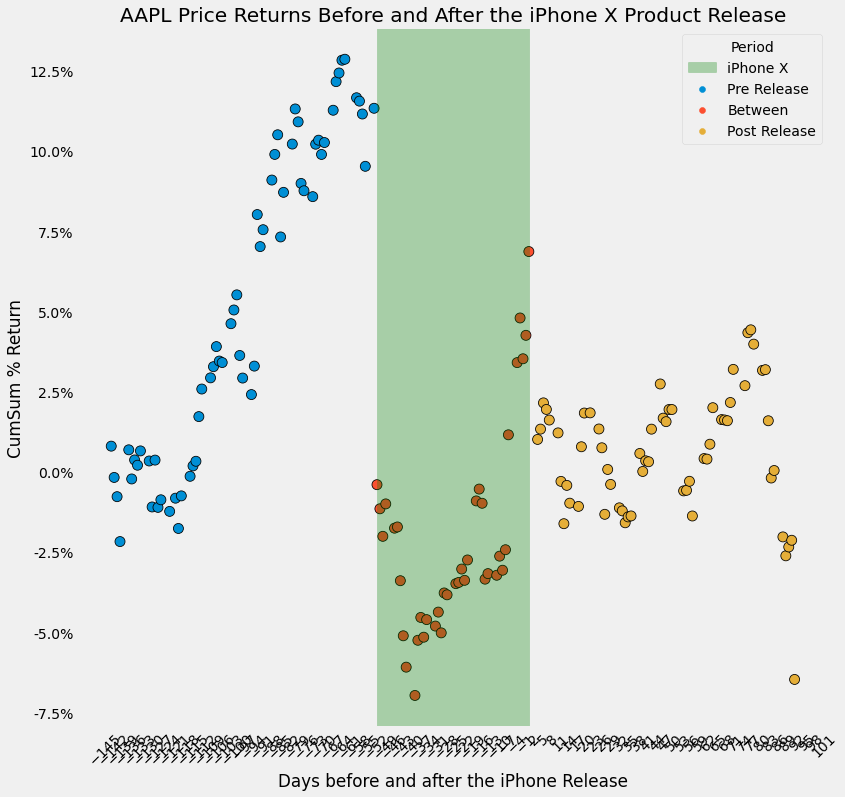

In [198]:
iPhone_X['% Return'] = iPhone_X['Adj Close'].pct_change()
iPhone_X['Cumulative % Return'] = iPhone_X['% Return'].cumsum()
iPhone_X['Date_2'] = iPhone_X['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('11/03/2017'):
        val = row['Date_2'] - pd.to_datetime('11/03/2017')
    else:
        val = row['Date_2'] - pd.to_datetime('11/03/2017')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/12/2017'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('11/03/2017'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/12/2017'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_X['Days'] = iPhone_X.apply(new,axis=1)
iPhone_X['Period'] = iPhone_X.apply(new2, axis=1)
iPhone_X['CumSum % Return'] = iPhone_X.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_X['Days'] = iPhone_X['Days'].astype(str)
iPhone_X['Days'] = iPhone_X['Days'].str.replace('days', '')
iPhone_X['CumSum % Return'] = iPhone_X['CumSum % Return']*100


iPhone_X['Days'] = iPhone_X['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-145,150, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone X Product Release')
ax.axvspan(-52,0, label="iPhone X", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_X, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphoneX.png')

## iPhone 6

In [199]:
iPhone_6.head()

,Date,Adj Close,Close,High,Low,Open,Volume
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0
13214,2014-06-11 00:00:00,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0
13215,2014-06-12 00:00:00,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0
13216,2014-06-13 00:00:00,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0


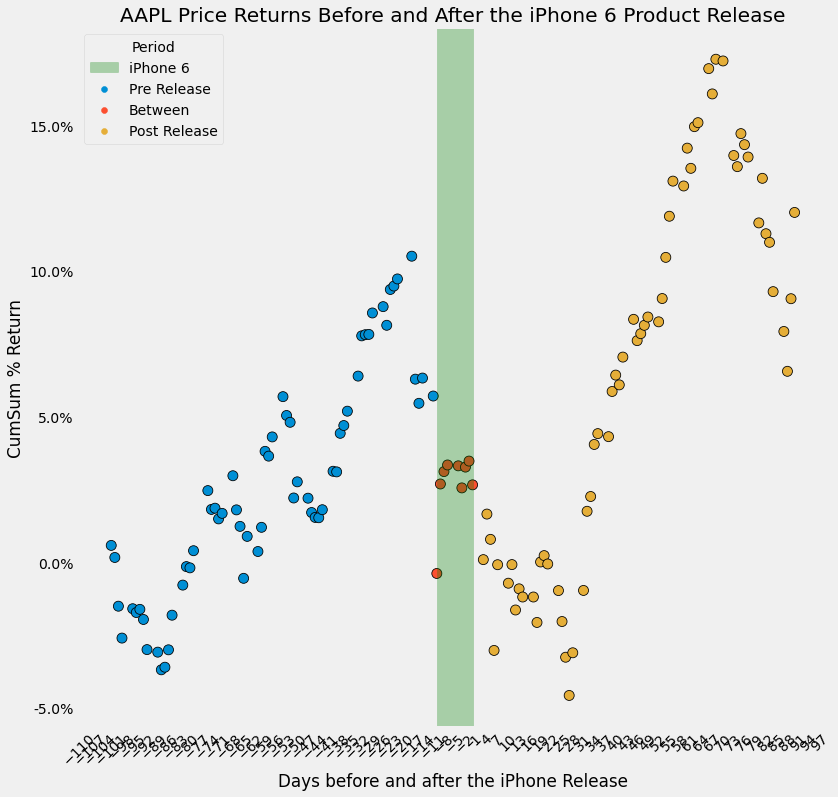

In [200]:
iPhone_6['% Return'] = iPhone_6['Adj Close'].pct_change()
iPhone_6['Cumulative % Return'] = iPhone_6['% Return'].cumsum()
iPhone_6['Date_2'] = iPhone_6['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/19/2014'):
        val = row['Date_2'] - pd.to_datetime('09/19/2014')
    else:
        val = row['Date_2'] - pd.to_datetime('09/19/2014')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/09/2014'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/19/2014'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/09/2014'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_6['Days'] = iPhone_6.apply(new,axis=1)
iPhone_6['Period'] = iPhone_6.apply(new2, axis=1)
iPhone_6['CumSum % Return'] = iPhone_6.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_6['Days'] = iPhone_6['Days'].astype(str)
iPhone_6['Days'] = iPhone_6['Days'].str.replace('days', '')
iPhone_6['CumSum % Return'] = iPhone_6['CumSum % Return']*100


iPhone_6['Days'] = iPhone_6['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 6 Product Release')
ax.axvspan(-10,0, label="iPhone 6", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_6, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone6.png')

## iPhone 7

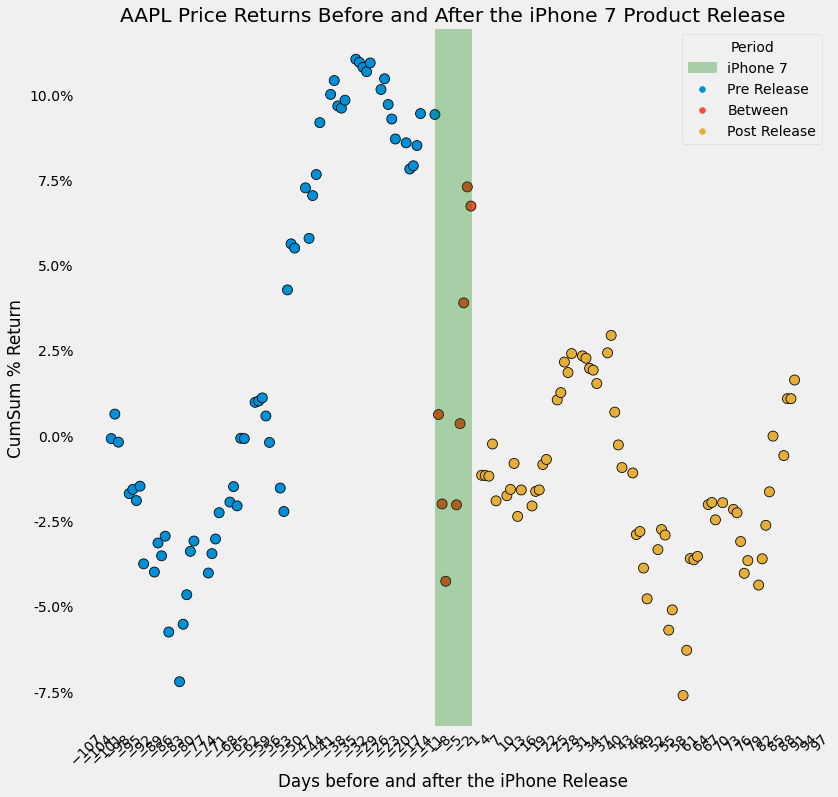

In [201]:
iPhone_7['% Return'] = iPhone_7['Adj Close'].pct_change()
iPhone_7['Cumulative % Return'] = iPhone_7['% Return'].cumsum()
iPhone_7['Date_2'] = iPhone_7['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/16/2016'):
        val = row['Date_2'] - pd.to_datetime('09/16/2016')
    else:
        val = row['Date_2'] - pd.to_datetime('09/16/2016')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/07/2016'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/16/2016'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/07/2016'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_7['Days'] = iPhone_7.apply(new,axis=1)
iPhone_7['Period'] = iPhone_7.apply(new2, axis=1)
iPhone_7['CumSum % Return'] = iPhone_7.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_7['Days'] = iPhone_7['Days'].astype(str)
iPhone_7['Days'] = iPhone_7['Days'].str.replace('days', '')
iPhone_7['CumSum % Return'] = iPhone_7['CumSum % Return']*100


iPhone_7['Days'] = iPhone_7['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 7 Product Release')
ax.axvspan(-10,0, label="iPhone 7", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_7, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone7.png')

## iPhone 8

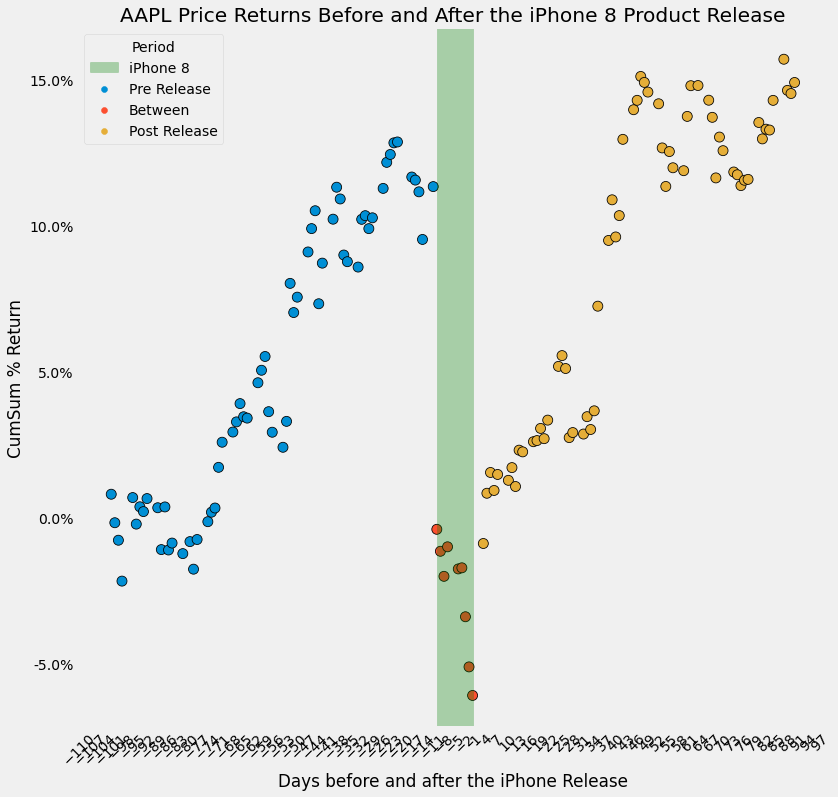

In [202]:
# 2017-09-12	2017-09-22

iPhone_8['% Return'] = iPhone_8['Adj Close'].pct_change()
iPhone_8['Cumulative % Return'] = iPhone_8['% Return'].cumsum()
iPhone_8['Date_2'] = iPhone_8['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/22/2017'):
        val = row['Date_2'] - pd.to_datetime('09/22/2017')
    else:
        val = row['Date_2'] - pd.to_datetime('09/22/2017')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/12/2017'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/22/2017'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/12/2017'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_8['Days'] = iPhone_8.apply(new,axis=1)
iPhone_8['Period'] = iPhone_8.apply(new2, axis=1)
iPhone_8['CumSum % Return'] = iPhone_8.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_8['Days'] = iPhone_8['Days'].astype(str)
iPhone_8['Days'] = iPhone_8['Days'].str.replace('days', '')
iPhone_8['CumSum % Return'] = iPhone_8['CumSum % Return']*100


iPhone_8['Days'] = iPhone_8['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 8 Product Release')
ax.axvspan(-10,0, label="iPhone 8", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_8, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone8.png')

## iPhone 11

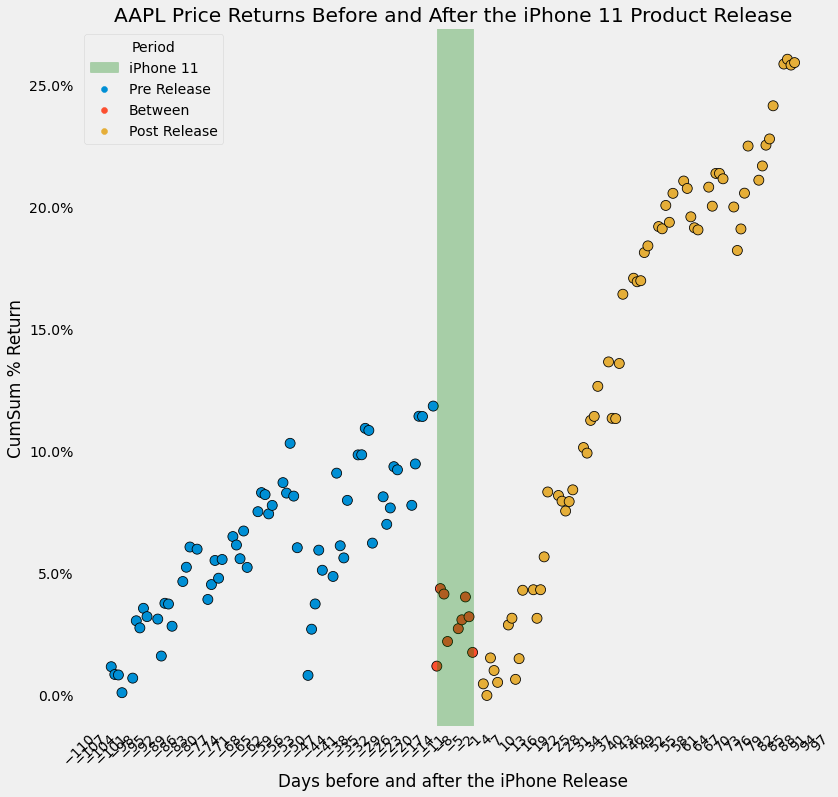

In [203]:
# 2019-09-10	2019-09-20

iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
iPhone_11['Date_2'] = iPhone_11['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/20/2019'):
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    else:
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/10/2019'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/20/2019'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/10/2019'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_11['Days'] = iPhone_11.apply(new,axis=1)
iPhone_11['Period'] = iPhone_11.apply(new2, axis=1)
iPhone_11['CumSum % Return'] = iPhone_11.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_11['Days'] = iPhone_11['Days'].astype(str)
iPhone_11['Days'] = iPhone_11['Days'].str.replace('days', '')
iPhone_11['CumSum % Return'] = iPhone_11['CumSum % Return']*100


iPhone_11['Days'] = iPhone_11['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 11 Product Release')
ax.axvspan(-10,0, label="iPhone 11", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_11, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone11.png')

## iPhone 12

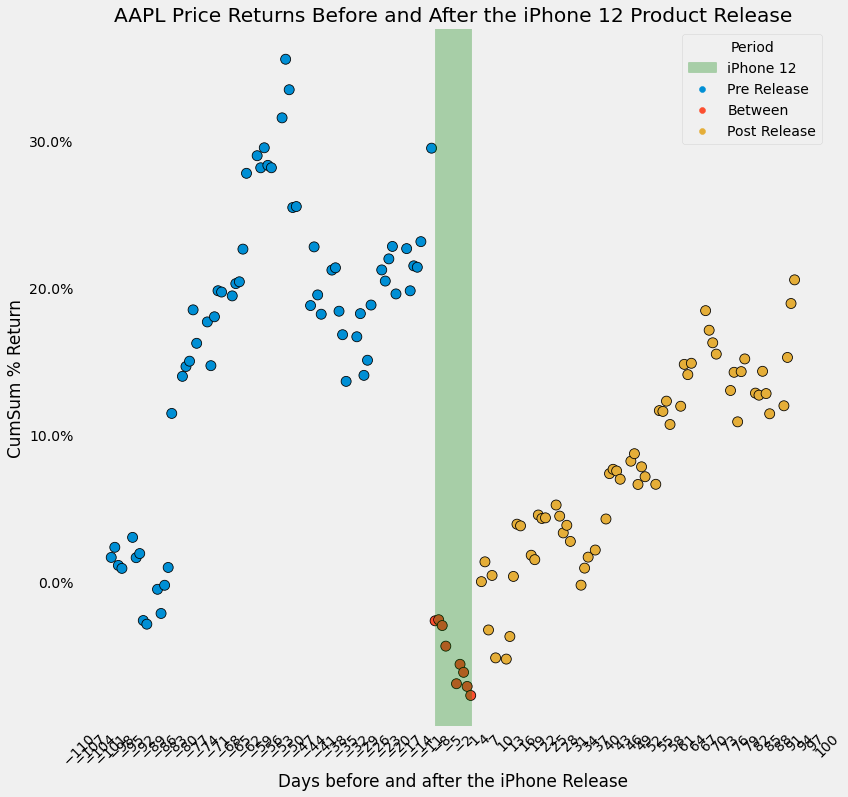

In [204]:
# 2020-10-13	2020-10-23

iPhone_12['% Return'] = iPhone_12['Adj Close'].pct_change()
iPhone_12['Cumulative % Return'] = iPhone_12['% Return'].cumsum()
iPhone_12['Date_2'] = iPhone_12['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('10/23/2020'):
        val = row['Date_2'] - pd.to_datetime('10/23/2020')
    else:
        val = row['Date_2'] - pd.to_datetime('10/23/2020')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('10/13/2020'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('10/23/2020'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('10/13/2020'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_12['Days'] = iPhone_12.apply(new,axis=1)
iPhone_12['Period'] = iPhone_12.apply(new2, axis=1)
iPhone_12['CumSum % Return'] = iPhone_12.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_12['Days'] = iPhone_12['Days'].astype(str)
iPhone_12['Days'] = iPhone_12['Days'].str.replace('days', '')
iPhone_12['CumSum % Return'] = iPhone_12['CumSum % Return']*100


iPhone_12['Days'] = iPhone_12['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 12 Product Release')
ax.axvspan(-10,0, label="iPhone 12", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_12, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone12.png')

## iPhone 13

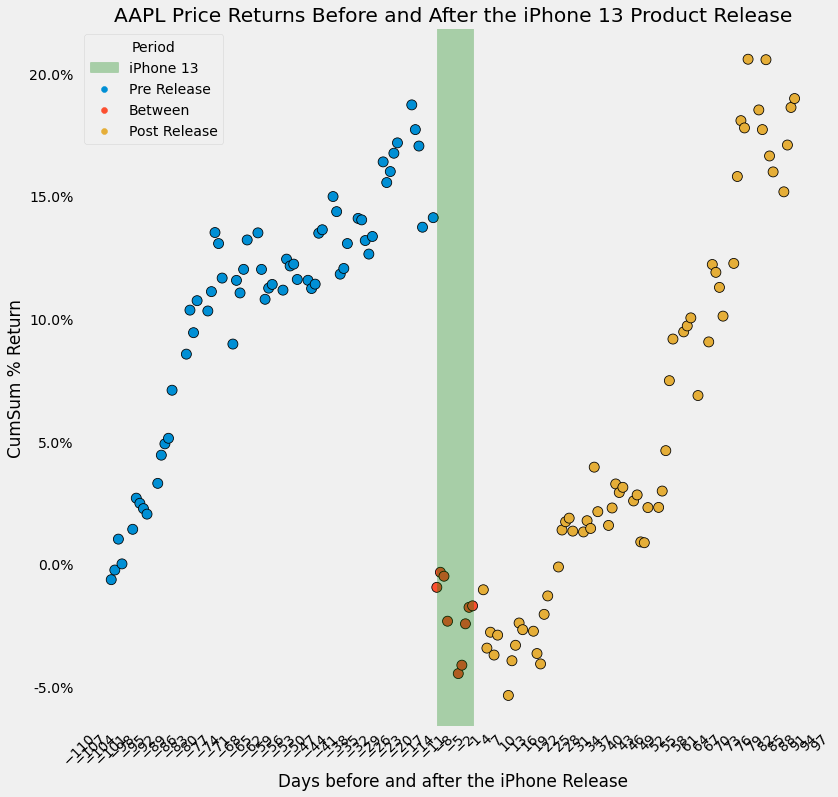

In [205]:
# 2021-09-14	2021-09-24	

iPhone_13['% Return'] = iPhone_13['Adj Close'].pct_change()
iPhone_13['Cumulative % Return'] = iPhone_13['% Return'].cumsum()
iPhone_13['Date_2'] = iPhone_13['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/22/2021'):
        val = row['Date_2'] - pd.to_datetime('09/24/2021')
    else:
        val = row['Date_2'] - pd.to_datetime('09/24/2021')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/14/2021'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/24/2021'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/11/2021'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_13['Days'] = iPhone_13.apply(new,axis=1)
iPhone_13['Period'] = iPhone_13.apply(new2, axis=1)
iPhone_13['CumSum % Return'] = iPhone_13.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_13['Days'] = iPhone_13['Days'].astype(str)
iPhone_13['Days'] = iPhone_13['Days'].str.replace('days', '')
iPhone_13['CumSum % Return'] = iPhone_13['CumSum % Return']*100


iPhone_13['Days'] = iPhone_13['Days'].astype('int')


fig, ax = plt.subplots(figsize=(12,12))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 13 Product Release')
ax.axvspan(-10,0, label="iPhone 13", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_13, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)
plt.savefig('iphone13.png')

In [206]:
# concat dataframes
df_list = [iPhone_6, iPhone_7, iPhone_8, iPhone_X, iPhone_11, iPhone_12, iPhone_13]
iPhone_6['iPhone'] = 'iPhone_6'
iPhone_7['iPhone'] = 'iPhone_7'
iPhone_8['iPhone'] = 'iPhone_8'
iPhone_X['iPhone'] = 'iPhone_X'
iPhone_11['iPhone'] = 'iPhone_11'
iPhone_12['iPhone'] = 'iPhone_12'
iPhone_13['iPhone'] = 'iPhone_13'


iphone_master = pd.concat(df_list)
iphone_master.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6
13214,2014-06-11 00:00:00,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6
13215,2014-06-12 00:00:00,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6
13216,2014-06-13 00:00:00,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6


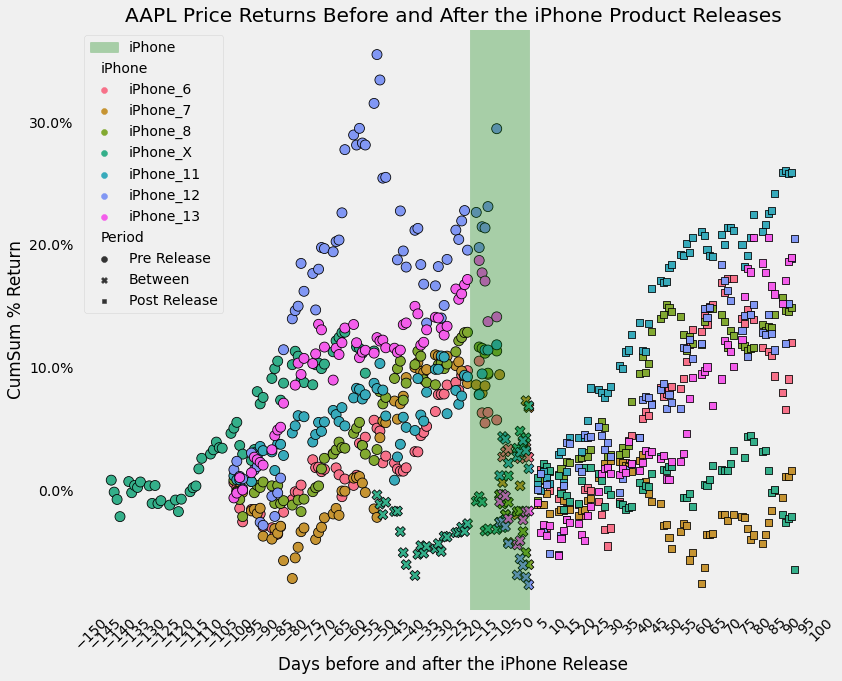

In [207]:

fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone Product Releases')
ax.axvspan(-20,0, label="iPhone", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iphone_master, x='Days', y='CumSum % Return', edgecolor='black',  hue='iPhone',style='Period',s=100)
plt.savefig('iphones_all.png')




In [208]:
iphone_avg = iphone_master.groupby('Days',as_index=False)['CumSum % Return'].mean()
iphone_avg.head()

,Days,CumSum % Return
0,-144,NaN
1,-143,0.804584
2,-142,-0.170946
3,-141,-0.770276
4,-140,-2.170232


<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone Product Releases'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

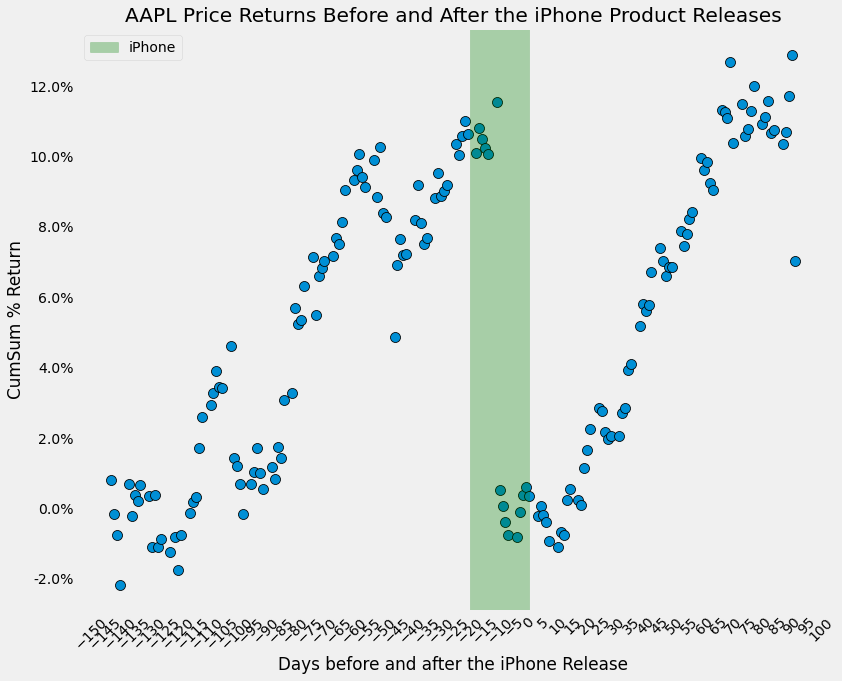

In [209]:
fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone Product Releases')
ax.axvspan(-20,0, label="iPhone", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iphone_avg, x='Days', y='CumSum % Return', edgecolor='black',s=100)





## SP 500 Data

In [210]:
iphone_master[iphone_master['iPhone']=='iPhone_6'].head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.9375,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.3925,23.682501,251108000.0,0.00587,0.00587,2014-06-10,-101,Pre Release,0.586965,iPhone_6


In [211]:
sp500_df = pd.read_csv('SP500.csv')
#sp500_df['SP500'] = sp500_df['SP500'].astype('float')
sp500_df['SP500'] = pd.to_numeric(sp500_df['SP500'],errors = 'coerce')
sp500_df['% 1-Day Return'] = sp500_df['SP500'].pct_change()*100
sp500_df.tail()

,DATE,SP500,% 1-Day Return
2021,2022-03-07,4201.09,-2.951810
2022,2022-03-08,4170.70,-0.723384
2023,2022-03-09,4277.88,2.569832
2024,2022-03-10,4259.52,-0.429185
2025,2022-03-11,4204.31,-1.296155


In [212]:
AAPL_price_subset['Volume Chg'] = AAPL_price_subset['Volume'].pct_change()*100

In [213]:
AAPL_price_subset.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Volume Chg
11214,2006-07-03 00:00:00,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0,NaN
11215,2006-07-05 00:00:00,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0,166.077256
11216,2006-07-06 00:00:00,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0,22.184282
11217,2006-07-07 00:00:00,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0,26.239686
11218,2006-07-10 00:00:00,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0,-33.778889


<AxesSubplot:xlabel='Date'>

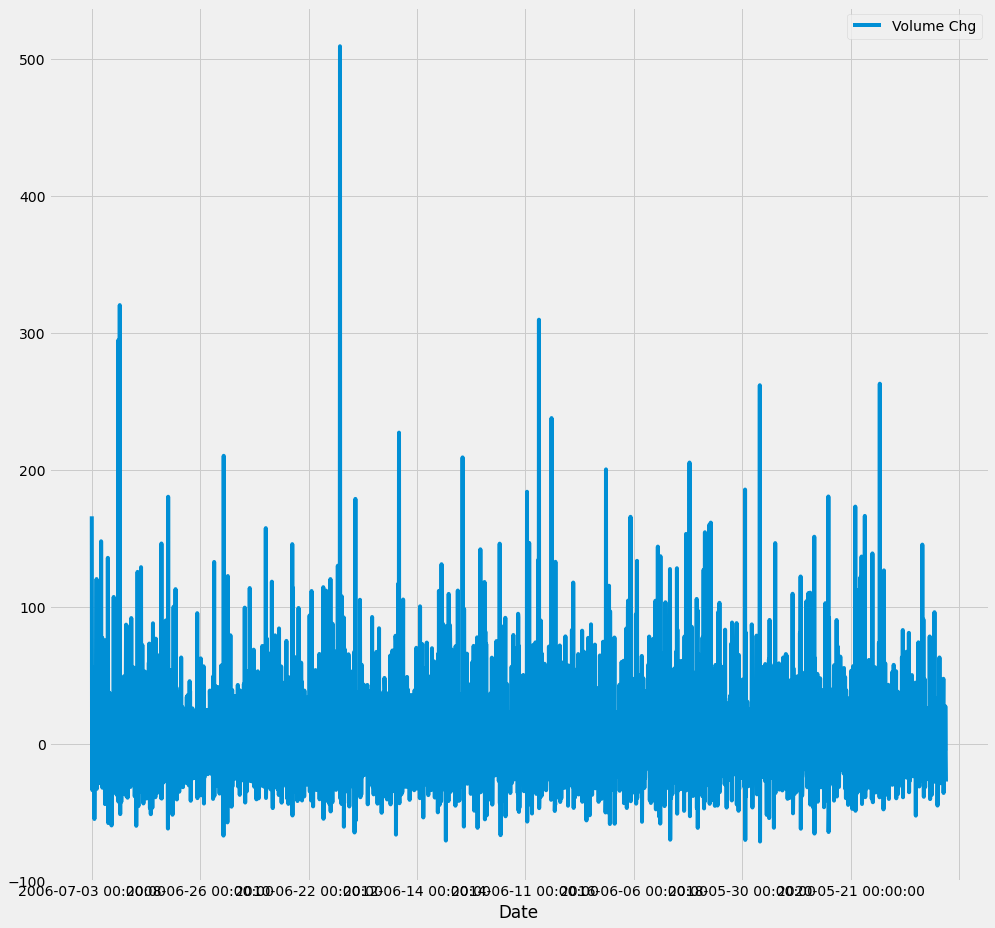

In [214]:
AAPL_price_subset.plot(x='Date', y='Volume Chg', figsize=(15,15))

In [215]:
# perform a join on the AAPl and SP500 data
sp500_df.head(2)

,DATE,SP500,% 1-Day Return
0,2014-06-06,1949.44,NaN
1,2014-06-09,1951.27,0.093873


In [216]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            2026 non-null   object 
 1   SP500           1956 non-null   float64
 2   % 1-Day Return  2025 non-null   float64
dtypes: float64(2), object(1)
memory usage: 47.6+ KB


In [217]:
AAPL_price_subset['Date'] = pd.to_datetime(AAPL_price_subset['Date'], format = '%Y-%m-%d %H:%M:%S')
AAPL_price_subset.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Volume Chg
11214,2006-07-03,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0,NaN
11215,2006-07-05,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0,166.077256
11216,2006-07-06,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0,22.184282
11217,2006-07-07,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0,26.239686
11218,2006-07-10,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0,-33.778889


In [218]:
iphone_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 13212 to 15116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 979 non-null    object        
 1   Adj Close            978 non-null    float64       
 2   Close                978 non-null    float64       
 3   High                 978 non-null    float64       
 4   Low                  978 non-null    float64       
 5   Open                 978 non-null    float64       
 6   Volume               978 non-null    float64       
 7   % Return             972 non-null    float64       
 8   Cumulative % Return  972 non-null    float64       
 9   Date_2               979 non-null    datetime64[ns]
 10  Days                 979 non-null    int64         
 11  Period               979 non-null    object        
 12  CumSum % Return      972 non-null    float64       
 13  iPhone               979 non-

In [219]:
sp500_df['Date'] = pd.to_datetime(sp500_df['DATE'], format = '%Y-%m-%d %H:%M:%S')
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            2026 non-null   object        
 1   SP500           1956 non-null   float64       
 2   % 1-Day Return  2025 non-null   float64       
 3   Date            2026 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 63.4+ KB


In [220]:
iphone_master['Date'] = iphone_master['Date'].astype('datetime64')

sp500_AAPL_df = pd.merge(iphone_master, sp500_df, on='Date', how='inner')
sp500_AAPL_df['AAPL % 1-Day Return'] = sp500_AAPL_df['Adj Close'].pct_change()*100
sp500_AAPL_df['Active'] = sp500_AAPL_df['AAPL % 1-Day Return'] - sp500_AAPL_df['% 1-Day Return']
sp500_AAPL_df.rename(columns={'% 1-Day Return':'SP500 % 1-Day Return'}, inplace=True)
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active
0,2014-06-09,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6,2014-06-09,1951.27,0.093873,NaN,NaN
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852


In [221]:
sp500_AAPL_df['AAPL % 1-Day Return'] = sp500_AAPL_df['Adj Close'].pct_change()*100
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active
0,2014-06-09,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6,2014-06-09,1951.27,0.093873,NaN,NaN
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852


In [222]:
sp500_AAPL_df['Active'] = sp500_AAPL_df['AAPL % 1-Day Return'] - sp500_AAPL_df['SP500 % 1-Day Return']
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active
0,2014-06-09,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6,2014-06-09,1951.27,0.093873,NaN,NaN
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852


In [223]:
iphone_master['Date'] = pd.to_datetime(iphone_master['Date'], format = '%Y-%m-%d %H:%M:%S')
iphone_master.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09,21.074381,23.424999,23.469999,22.9375,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10,21.198080,23.562500,23.762501,23.3925,23.682501,251108000.0,0.00587,0.00587,2014-06-10,-101,Pre Release,0.586965,iPhone_6


In [224]:
sp500_AAPL_df['iPhone'].value_counts()

iPhone_X     164
iPhone_11    137
iPhone_6     136
iPhone_8     136
iPhone_13    136
iPhone_7     135
iPhone_12    135
Name: iPhone, dtype: int64

In [225]:
sp500_AAPL_df = pd.merge(iphone_master, sp500_df, on='Date', how='inner')
sp500_AAPL_df['AAPL % 1-Day Return'] = sp500_AAPL_df['Adj Close'].pct_change()*100
sp500_AAPL_df['Active'] = sp500_AAPL_df['AAPL % 1-Day Return'] - sp500_AAPL_df['% 1-Day Return']
sp500_AAPL_df.rename(columns={'% 1-Day Return':'SP500 % 1-Day Return'}, inplace=True)
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active
0,2014-06-09,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6,2014-06-09,1951.27,0.093873,NaN,NaN
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852


In [226]:
sp500_AAPL_df = sp500_AAPL_df[sp500_AAPL_df['% Return'].notna()]
sp500_AAPL_df['Active CumSum'] = sp500_AAPL_df.groupby(['iPhone'])['Active'].cumsum(axis=0)

sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812,-0.412316
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852,-1.820168
5,2014-06-16,20.737011,23.049999,23.187500,22.862499,22.877501,142244000.0,0.010079,-0.015860,2014-06-16,-95,Pre Release,-1.586005,iPhone_6,2014-06-16,1937.78,0.083671,1.007899,0.924228,-0.895940


In [227]:
df_sort=sp500_AAPL_df.sort_values(['Date']).reset_index(drop=True)
df_sort['Active Cumsum2'] = df_sort.groupby(['iPhone'])['Active'].cumsum(axis=0)
df_sort.loc[(df_sort['iPhone']=='iPhone_7')|(df_sort['iPhone']=='iPhone_8')]

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,Active Cumsum2
135,2016-06-08,23.107069,24.735001,24.889999,24.670000,24.754999,83392400.0,-0.000909,-0.000909,2016-06-08,...,Pre Release,-0.090864,iPhone_7,2016-06-08,2119.12,0.330946,-0.090864,-0.421810,-0.421810,-0.421810
136,2016-06-09,23.272882,24.912500,24.997499,24.615000,24.625000,106405600.0,0.007176,0.006267,2016-06-09,...,Pre Release,0.626723,iPhone_7,2016-06-09,2115.48,-0.171769,0.717588,0.889357,0.467547,0.467547
137,2016-06-10,23.081377,24.707500,24.837500,24.620001,24.632500,126851600.0,-0.008229,-0.001961,2016-06-10,...,Pre Release,-0.196146,iPhone_7,2016-06-10,2096.07,-0.917522,-0.822869,0.094653,0.562200,0.562200
138,2016-06-13,22.733387,24.334999,24.780001,24.275000,24.672501,152082000.0,-0.015077,-0.017038,2016-06-13,...,Pre Release,-1.703812,iPhone_7,2016-06-13,2079.06,-0.811519,-1.507666,-0.696147,-0.133947,-0.133947
139,2016-06-14,22.761415,24.365000,24.620001,24.187500,24.330000,127727600.0,0.001233,-0.015805,2016-06-14,...,Pre Release,-1.580520,iPhone_7,2016-06-14,2075.32,-0.179889,0.123292,0.303181,0.169234,0.169234
140,2016-06-15,22.686680,24.285000,24.602501,24.257500,24.455000,117780800.0,-0.003283,-0.019089,2016-06-15,...,Pre Release,-1.908863,iPhone_7,2016-06-15,2071.50,-0.184068,-0.328344,-0.144276,0.024958,0.024958
141,2016-06-16,22.782436,24.387501,24.437500,24.017500,24.112499,125307200.0,0.004221,-0.014868,2016-06-16,...,Pre Release,-1.486781,iPhone_7,2016-06-16,2077.99,0.313300,0.422083,0.108783,0.133742,0.133742
142,2016-06-17,22.263964,23.832500,24.162500,23.825001,24.155001,244032800.0,-0.022758,-0.037625,2016-06-17,...,Pre Release,-3.762537,iPhone_7,2016-06-17,2071.22,-0.325796,-2.275756,-1.949960,-1.816219,-1.816219
143,2016-06-20,22.210251,23.775000,24.142500,23.757500,24.000000,137647600.0,-0.002413,-0.040038,2016-06-20,...,Pre Release,-4.003791,iPhone_7,2016-06-20,2083.25,0.580817,-0.241255,-0.822072,-2.638291,-2.638291
144,2016-06-21,22.399418,23.977501,24.087500,23.670000,23.735001,142185600.0,0.008517,-0.031521,2016-06-21,...,Pre Release,-3.152081,iPhone_7,2016-06-21,2088.90,0.271211,0.851710,0.580500,-2.057791,-2.057791


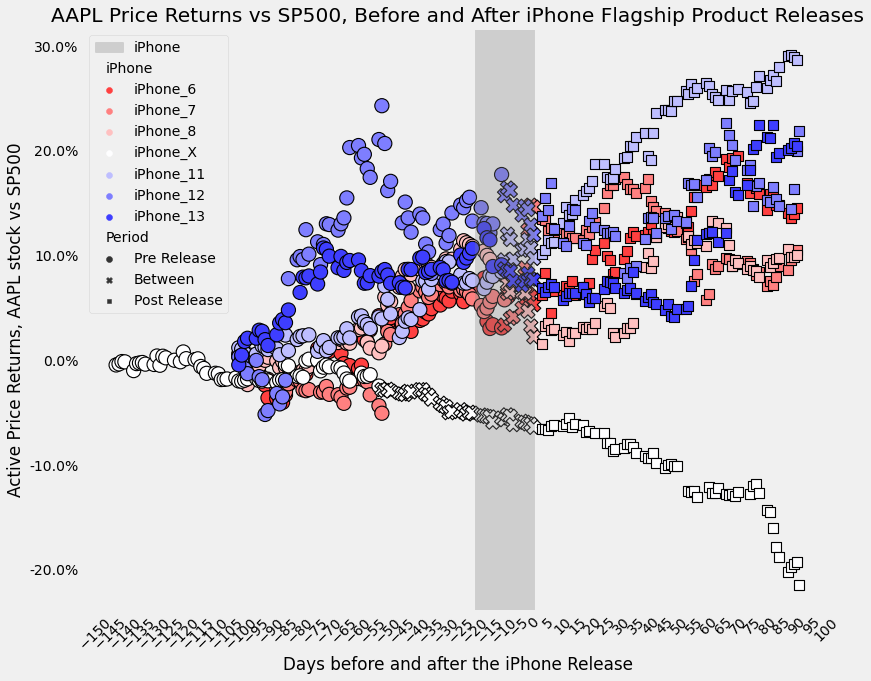

In [228]:



fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns vs SP500, Before and After iPhone Flagship Product Releases')
ax.set_ylabel('Active Price Returns, AAPL stock vs SP500')
ax.axvspan(-20,0, label="iPhone", color="gray", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.color_palette("rocket")
sns.scatterplot(data=sp500_AAPL_df.dropna(), x='Days', y='Active CumSum', edgecolor='black',  
                hue='iPhone',style='Period',palette="bwr_r",s=200)
plt.savefig('iPhone_sp500.png')





## Binning

In [229]:
sp500_AAPL_df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum
1,2014-06-10,21.198080,23.5625,23.762501,23.3925,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564
2,2014-06-11,21.110369,23.4650,23.690001,23.3675,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497


In [230]:
labels=['>100 Days Before', '90 Days Before', '80 Days Before', '70 Days Before', '60 Days Before',
       '50 Days Before', '40 Days Before', '30 Days Before', '20 Days Before', '10 Days Before',
       '0 Days Before', '10 Days After', '20 Days After', '30 Days After', '40 Days After', '50 Days After', '60 Days After', '70 Days After', '>80 Days After']
sp500_AAPL_df['ten_day_cohort'] = pd.qcut(sp500_AAPL_df['Days'], 19, labels=labels)
sp500_AAPL_df['ten_day_cohort'].value_counts().sort_index()


>100 Days Before    56
90 Days Before      49
80 Days Before      52
70 Days Before      48
60 Days Before      55
50 Days Before      48
40 Days Before      56
30 Days Before      49
20 Days Before      52
10 Days Before      48
0 Days Before       56
10 Days After       49
20 Days After       48
30 Days After       55
40 Days After       49
50 Days After       54
60 Days After       50
70 Days After       48
>80 Days After      50
Name: ten_day_cohort, dtype: int64

In [231]:
sp500_AAPL_df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,ten_day_cohort
1,2014-06-10,21.198080,23.5625,23.762501,23.3925,23.682501,251108000.0,0.005870,0.005870,2014-06-10,...,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564,>100 Days Before
2,2014-06-11,21.110369,23.4650,23.690001,23.3675,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,...,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497,>100 Days Before


In [232]:
ten_day_cohorts_AAPL = sp500_AAPL_df.groupby('ten_day_cohort').agg({'AAPL % 1-Day Return': ['mean']})
ten_day_cohorts_AAPL

ten_day_cohorts_SP500 = sp500_AAPL_df.groupby('ten_day_cohort').agg({'SP500 % 1-Day Return': ['mean']})

ten_day_cohorts_active = sp500_AAPL_df.groupby('ten_day_cohort').agg({'Active': ['mean']})
ten_day_cohorts_active

,Active
,mean
ten_day_cohort,
>100 Days Before,-0.079666
90 Days Before,-0.079481
80 Days Before,0.467409
70 Days Before,0.155600
60 Days Before,0.081919
50 Days Before,0.135106
40 Days Before,0.118521
30 Days Before,0.184716


In [233]:
ten_day_cohorts_AAPL_active = ten_day_cohorts_AAPL.join([ten_day_cohorts_SP500,ten_day_cohorts_active])

def negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

def column_bold(val):
    bold = 'bold' if ((val >.2) & (val <1.0)) else ''


    return 'font-weight: %s' % bold



cohorts_styled = ten_day_cohorts_AAPL_active.style.format("{:.2}%").applymap(negative_red).applymap(column_bold).set_caption('AAPL stock more frequently outperforms the S&P 500 AFTER the release of an iPhone than BEFORE -- but the period BEFORE features outperformance at a greater magnitude')
dfi.export(cohorts_styled,"cohort_returns.png")
cohorts_styled



,AAPL % 1-Day Return,SP500 % 1-Day Return,Active
,mean,mean,mean
ten_day_cohort,,,
>100 Days Before,-0.071%,0.009%,-0.08%
90 Days Before,-0.0019%,0.078%,-0.079%
80 Days Before,0.64%,0.18%,0.47%
70 Days Before,0.25%,0.096%,0.16%
60 Days Before,0.23%,0.15%,0.082%
50 Days Before,-0.089%,-0.22%,0.14%
40 Days Before,0.15%,0.031%,0.12%
30 Days Before,0.31%,0.13%,0.18%


## pandas profiling

In [234]:
#profile = ProfileReport(AAPL_price_subset, title="AAPL prices",explorative=True)
#profile.to_file('AAPL_prices.html')

In [235]:
#profile = ProfileReport(sp500_df, title="SP500 prices",explorative=True)
#rofile.to_file('SP500_prices.html')

In [236]:
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,ten_day_cohort
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,...,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564,>100 Days Before
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,...,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497,>100 Days Before
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,...,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812,-0.412316,>100 Days Before
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,...,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852,-1.820168,>100 Days Before
5,2014-06-16,20.737011,23.049999,23.187500,22.862499,22.877501,142244000.0,0.010079,-0.015860,2014-06-16,...,Pre Release,-1.586005,iPhone_6,2014-06-16,1937.78,0.083671,1.007899,0.924228,-0.895940,90 Days Before


## Sharpe Ratio

In [237]:
sharpe_AAPL = sp500_AAPL_df['AAPL % 1-Day Return'].mean() / sp500_AAPL_df['AAPL % 1-Day Return'].std()
Ann_sharpe_AAPL = (252**0.5) * sharpe_AAPL

sharpe_SP500 = sp500_AAPL_df['SP500 % 1-Day Return'].mean() / sp500_AAPL_df['SP500 % 1-Day Return'].std()
Ann_sharpe_SP500 = (252**0.5)*sharpe_SP500

In [238]:

sharpe_AAPL_pre = sp500_AAPL_df.groupby('Period')['AAPL % 1-Day Return'].mean() / sp500_AAPL_df.groupby('Period')['AAPL % 1-Day Return'].std()
sharpe_AAPL_df = sharpe_AAPL_pre.to_frame()
sharpe_AAPL_df.reset_index()
sharpe_AAPL_df['AAPL % 1-Day Return'] = sharpe_AAPL_df['AAPL % 1-Day Return'] * (252**0.5)
sharpe_AAPL_df = sharpe_AAPL_df.rename(columns = {'AAPL % 1-Day Return':'Annualized Sharpe'}).sort_values(by='Annualized Sharpe', ascending=False)
sharpe_df = sharpe_AAPL_df['Annualized Sharpe'].round(2).to_frame()
#Ann_sharpe_AAPL_pre = (252**0.5) * sharpe_AAPL
#sharpe_AAPL_df

sharpe_df



,Annualized Sharpe
Period,
Post Release,2.26
Pre Release,1.88
Between,-0.66
